In [19]:
import networkx as nx
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

stmarks = nx.read_gml('data/stmarks.gml')
species = np.array(stmarks.nodes())
Adj =  nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64) #adjacency_matrix
n = len(species)
np.seterr(divide='ignore')
degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr() # Eigenvaules, Compressed Sparse Row format
Trans = (Deginv @ Adj).T #transition matrix

In [20]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping
I = sparse.eye(n, format='csc') #Same sparse format as Trans
pagerank = spsolve(I - damping * Trans, np.full(n, beta /n))

In [21]:
def pagerank_plot(in_degress, pageranks, names, *, annotations=[], **figkwargs):
    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degress, pageranks, c=[0.835, 0.368, 0], lw=0)
    for name, indeg, pr in zip(names, in_degress, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)
    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degress) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


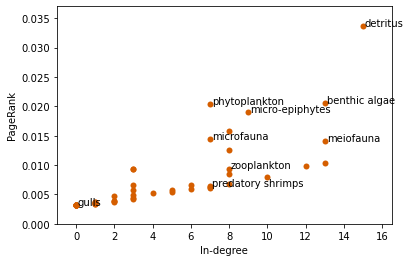

In [22]:
interesting = ['detritus', 'phytoplankton', 'benthic algae', 'micro-epiphytes',
'microfauna', 'zooplankton', 'predatory shrimps', 'meiofauna',
'gulls']
in_degree = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degress=in_degree, pageranks= pagerank, names=species, annotations=interesting)